PROGRAMA PARA PROCESAMIENTO DE ESPECTROS
CARACTERIZACION DE LA FIRMA ESPECTRAL
SATREPS - F7 (Fase 7). PROYECTO MINCIENCIAS
PROCESANDO ESPECTRO

0. IMPORTANDO LIBRERIAS Y CONTROL DE WARNINGS

In [15]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys
#import pathlib 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore") 

1. CARGAR ARCHIVO DESDE DIRECTORIO

In [16]:
plt.style.use('ggplot')
a=r'C:\Users\Asus\Documents\AGROSAVIA_2025\BASE_DATOS_MGSN5\EXPERIMENTAL_DATA_MGSN5\1-7Mar2025\Spectrum\7'
os.chdir(a)
os.listdir(a)

['1.txt',
 '2.txt',
 '3.txt',
 '4.txt',
 'Covarianza.csv',
 'DataMeanSpectrumNum.txt',
 'grafico_transparente.png',
 'SpectralSigProcessed.csv']

2. LECTURA DE DATOS DE LOS ESPECTROS (4) Y SU MEDIA

In [17]:
Map = {"column_1":"lambda(nm)","column_2":"%R"}

def MapElements(t):
    return t[0].replace(",","."),t[1].replace(",",".")

# 2.1 Espectros individuales 
Data_Spectrum1 = pl.read_csv("1.txt",skip_rows=14,has_header=False,separator="\t").rename(Map).with_columns(
pl.col("lambda(nm)").str.replace(",",".").cast(pl.Float32) , pl.col("%R").str.replace(",",".").cast(pl.Float32) ).filter(
(pl.col("%R") <= 100) & (pl.col("%R") >= 0) )
Data_Spectrum2 = pl.read_csv("2.txt",skip_rows=14,has_header=False,separator="\t").rename(Map).with_columns(
pl.col("lambda(nm)").str.replace(",",".").cast(pl.Float32) , pl.col("%R").str.replace(",",".").cast(pl.Float32) ).filter(
(pl.col("%R") <= 100) & (pl.col("%R") >= 0) )
Data_Spectrum3 = pl.read_csv("2.txt",skip_rows=14,has_header=False,separator="\t").rename(Map).with_columns(
pl.col("lambda(nm)").str.replace(",",".").cast(pl.Float32) , pl.col("%R").str.replace(",",".").cast(pl.Float32) ).filter(
(pl.col("%R") <= 100) & (pl.col("%R") >= 0) )
Data_Spectrum4 = pl.read_csv("2.txt",skip_rows=14,has_header=False,separator="\t").rename(Map).with_columns(
pl.col("lambda(nm)").str.replace(",",".").cast(pl.Float32) , pl.col("%R").str.replace(",",".").cast(pl.Float32) ).filter(
(pl.col("%R") <= 100) & (pl.col("%R") >= 0) )

# 2.2 Media de los espectros
NoSpectrum=4
DataMeanSpectrum=(Data_Spectrum1+Data_Spectrum2+Data_Spectrum3+Data_Spectrum4)/NoSpectrum

#2.3. Guardando la media de los espectros
DataMeanSpectrumNum=DataMeanSpectrum.to_numpy()
np.savetxt('DataMeanSpectrumNum.txt', np.array(DataMeanSpectrumNum).T, delimiter=",", header='[R], [lambda]', fmt='%1f')
print(DataMeanSpectrumNum)

[[344.96224976  59.94749832]
 [347.12124634  40.17749786]
 [347.34222412  40.00999832]
 ...
 [         nan          nan]
 [         nan          nan]
 [         nan          nan]]


2. GRÁFICO DE LA MEDIA DEL ESPECTRO

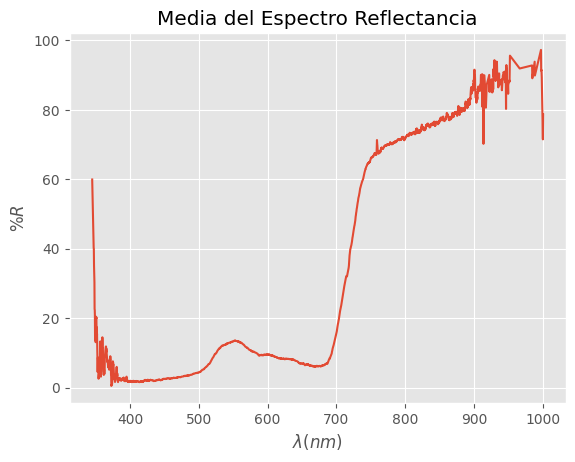

In [18]:
plt.plot(DataMeanSpectrumNum[:,0], DataMeanSpectrumNum[:,1])
plt.xlabel(r"$\lambda (nm)$")
plt.ylabel(r"$\%R$")
plt.title("Media del Espectro Reflectancia")
plt.show()

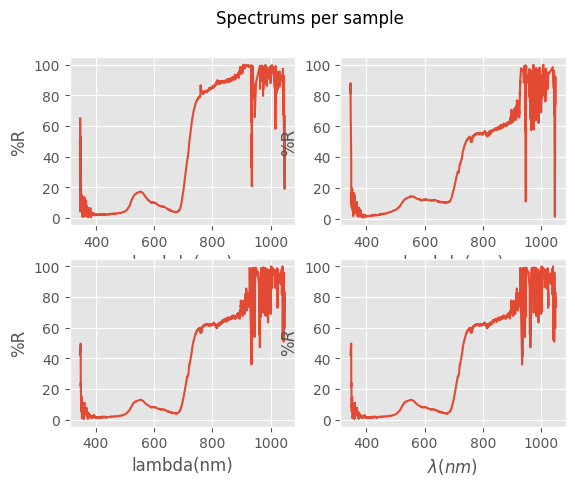

In [19]:
# DATA DE ESPECTROS INDIVIDUALES
Data1 = pl.scan_csv("1.txt",skip_rows=14,has_header=False,separator="\t").rename(Map).with_columns(
pl.col("lambda(nm)").str.replace(",",".").cast(pl.Float32) , pl.col("%R").str.replace(",",".").cast(pl.Float32) ).filter(
(pl.col("%R") <= 100) & (pl.col("%R") >= 0) )
Data2 = pl.scan_csv("3.txt",skip_rows=14,has_header=False,separator="\t").rename(Map).with_columns(
pl.col("lambda(nm)").str.replace(",",".").cast(pl.Float32) , pl.col("%R").str.replace(",",".").cast(pl.Float32) ).filter(
(pl.col("%R") <= 100) & (pl.col("%R") >= 0) )
Data3 = pl.scan_csv("4.txt",skip_rows=14,has_header=False,separator="\t").rename(Map).with_columns(
pl.col("lambda(nm)").str.replace(",",".").cast(pl.Float32) , pl.col("%R").str.replace(",",".").cast(pl.Float32) ).filter(
(pl.col("%R") <= 100) & (pl.col("%R") >= 0) )
Data4 = pl.scan_csv("4.txt",skip_rows=14,has_header=False,separator="\t").rename(Map).with_columns(
pl.col("lambda(nm)").str.replace(",",".").cast(pl.Float32) , pl.col("%R").str.replace(",",".").cast(pl.Float32) ).filter(
(pl.col("%R") <= 100) & (pl.col("%R") >= 0) )

#Grafico
#g = sns.FacetGrid(height=4, aspect=.5)
fig, axes = plt.subplots(2, 2)
fig.suptitle('Spectrums per sample')
sns.lineplot(ax=axes[0, 0], data=Data1.collect(),x="lambda(nm)",y="%R")
sns.lineplot(ax=axes[0, 1],data=Data2.collect(),x="lambda(nm)",y="%R")
sns.lineplot(ax=axes[1, 1],data=Data3.collect(),x="lambda(nm)",y="%R")
sns.lineplot(ax=axes[1, 0],data=Data4.collect(),x="lambda(nm)",y="%R")
plt.xlabel(r"$\lambda(nm)$")
plt.ylabel(r"$\%R$")
plt.show()

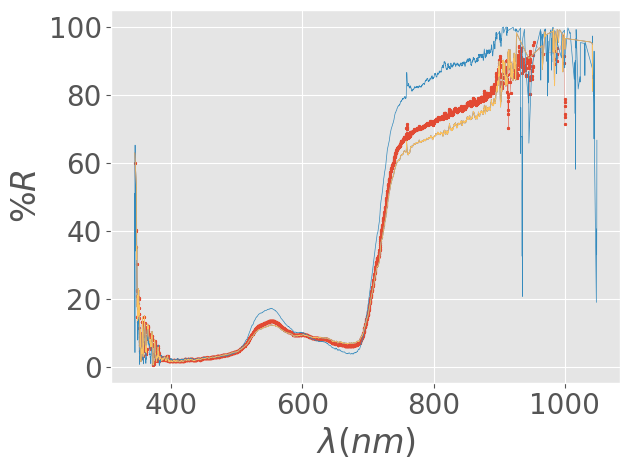

In [20]:
#Data to Numpy array
Data_Spectrum11=Data_Spectrum1.to_numpy()
Data_Spectrum22=Data_Spectrum2.to_numpy()
Data_Spectrum33=Data_Spectrum3.to_numpy()
Data_Spectrum44=Data_Spectrum4.to_numpy()
#Grafico de todos los espectros

fig = plt.figure()
fig.clf()
ax = fig.subplots(1,1)
plt.grid

ax.plot(DataMeanSpectrumNum[:,0], DataMeanSpectrumNum[:,1], linewidth=0.2, marker = '*', markersize=2)
ax.plot(Data_Spectrum11[:,0], Data_Spectrum11[:,1], linewidth=0.5)
ax.plot(Data_Spectrum22[:,0], Data_Spectrum22[:,1], linewidth=0.5)
ax.plot(Data_Spectrum33[:,0], Data_Spectrum33[:,1], linewidth=0.5)
ax.plot(Data_Spectrum44[:,0], Data_Spectrum44[:,1], linewidth=0.5)

ax.set_xlabel(r"$\lambda (nm)$",  fontsize=24 )
ax.set_ylabel(r"$\%R$", fontsize=24)

plt.tick_params(axis='x', labelsize=20)  # Cambia 'labelsize' para el eje X
plt.tick_params(axis='y', labelsize=20)  # Cambia 'labelsize' para el eje Y
#ax.set_title('Espectros Simultáneos')

#ax.legend()
fig.tight_layout()
fig.show()   
plt.savefig("grafico_transparente.png", transparent=True, dpi=300)

4. CALCULO DE VALORES DE REFLECTANCIA A LONGITUDES DE ONDA DE INTERES

In [21]:
#REFLECTANCIA (TOMADA DE LA MEDIA DEL ESPECTRO)
R840=np.mean(DataMeanSpectrumNum[(np.where((DataMeanSpectrumNum[:,0] <= 850) & ( 840 <= DataMeanSpectrumNum[:,0] ))),1])/100 #NIR
R668=np.mean(DataMeanSpectrumNum[(np.where((DataMeanSpectrumNum[:,0] <= 678) & ( 660 <= DataMeanSpectrumNum[:,0] ))),1])/100 #RED (R)
R717=np.mean(DataMeanSpectrumNum[(np.where((DataMeanSpectrumNum[:,0] <= 727) & ( 707 <= DataMeanSpectrumNum[:,0] ))),1])/100 #REDEDGE
R560=np.mean(DataMeanSpectrumNum[(np.where((DataMeanSpectrumNum[:,0] <= 570) & ( 550 <= DataMeanSpectrumNum[:,0] ))),1])/100 #GREEN (G)
R450=np.mean(DataMeanSpectrumNum[(np.where((DataMeanSpectrumNum[:,0] <= 495) & ( 450 <= DataMeanSpectrumNum[:,0] ))),1])/100 #BLUE (B)

5. CALCULO DE INDICES DE VEGETACIÓN 
5.1. LOS QUE "COINCIDEN" CON LOS DE DRON COMERCIAL (3)

In [22]:
NDVI=round((R840-R668) / (R840+R668),3)
GNDVI=round((R840-R560) / (R840+R560),3)
NDRED= round((R717-R668)/(R717+R668),3)

5.2. OTROS INDICES DE VEGETACIÓN (26)

In [23]:
#Factores
L_fact=0.5 #L=1 baja veg, 0.5 media y 0 alta
R_red_blue=R668-1*(R668-R450)
#INDICES 
SRI=round(R668/R840,3)
TVI=round(np.sqrt(NDVI-0.5),3)
SAVI= round((1+L_fact)*(R840-R668) / (R840+R668+L_fact),3)
OSAVI= round((R840-R668) / (R840+R668+0.16),3)
ARVI=round((R840-R_red_blue) / (R840+R_red_blue),3)
SARVI=round((1+L_fact)*(R840-R_red_blue) / (R840+R_red_blue+L_fact),3)
SARVI2=round(2.5*(1+L_fact)*(R840-R668)/(R840-6*R668-7.5*R668+L_fact),3)
EVI2=round(2.5*(R840-R668)/(R840-2.4*R668 +L_fact),3)
NLI=round((R840**2-R668) / (R840**2+R668),3)
VARI=round((R560-R668) / (R560+R668-R450),3)
CLGR=round((R840/R560)-1,3)  #Chlorofyl Index Green
CLRE=round((R840/R717)-1,3)  #Chlorofyl Index Red Edge
NDWI=round((R840-R560) / (R840+R560),3)
RDVI=round((R840-R560) / np.sqrt(R840+R560),3)
WDRVI=round((0.1*R840-R560) / (0.1*R840+R560),3)
NGRVI=round((R560-R668)/(R560-R668),3)
GRVI=round((R560**2-R668**2)/(R560**2-R668**2),3)
LAI=round(3.618*SARVI-0.118, 3)  #Leaf Area Index
ARI1=round((1/R560) -(1/R717),3)
ARI2=round(R840*((1/R560) -(1/R717)),3)
BGI=round(R450/R560,3)
BRI=round(R450/R668,3)
NPCI=round((R560-R668)/(R560-R668),3) #normalized pigment chrolofyll RI
NPQI=round((R668-R450) / (R668+R450),3)
PSRI=round(R668-R560/R717,3)   #Plant Senescence reflectance Index
SIPI=round(R840-R450/(R840-R668),3)

6. SPECTRUM SLICING: CALCULO DE PENDIENTE EN LONGITUD DE ONDA REDEDGE

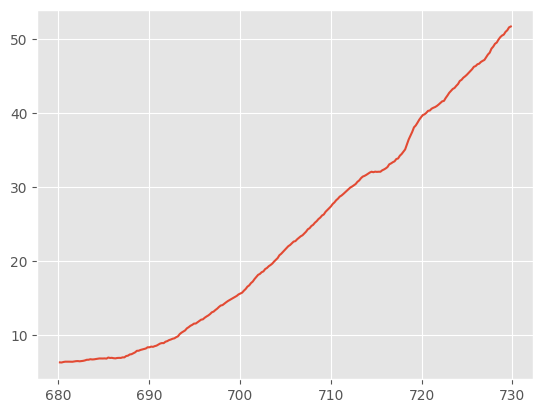

In [24]:
indexRslope=(np.where((DataMeanSpectrumNum[:,0] <= 730) & ( 680 <= DataMeanSpectrumNum[:,0] )))
lambdaSlope_REDEDGE=DataMeanSpectrumNum[indexRslope,0]
RSlope_REDEDGE=DataMeanSpectrumNum[indexRslope,1]
Slope_REDEDEGE=(RSlope_REDEDGE[:,0] - RSlope_REDEDGE[:,-1])/(lambdaSlope_REDEDGE[:,0] - lambdaSlope_REDEDGE[:,-1])
plt.plot(lambdaSlope_REDEDGE[:,:][0,:], RSlope_REDEDGE[:,:][0,:])
plt.show()

7.SPECTRUM SLICING: CALCULO DE LONGITUD DE ONDA EN EL VERDE (GREEN: G)

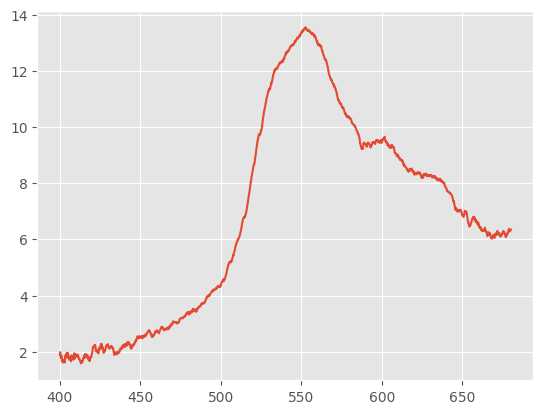

In [25]:
indexRPeakGREEN=(np.where((DataMeanSpectrumNum[:,0] <= 680) & ( 400 <= DataMeanSpectrumNum[:,0] )))
lambdaPeak_GREEN=DataMeanSpectrumNum[indexRPeakGREEN,0]
RData_GREEN=DataMeanSpectrumNum[indexRPeakGREEN,1]
PeakMaxGREEN=np.array(np.max(RData_GREEN), dtype='float64')*1E-2
index_lambdaMaxGREEN=(np.where(RData_GREEN[:,:][0,:] == PeakMaxGREEN))
PeakGreen=np.round(lambdaPeak_GREEN[:,:][0,index_lambdaMaxGREEN])
plt.plot(lambdaPeak_GREEN[:,:][0,:], RData_GREEN[:,:][0,:])
plt.show()

CARACTERIZACION DE LA FIRMA ESPECTRAL CON:
INDICES DE VEGETACIÓN
REFLECTANCIA: RED, GREEN, BLUE, NIR
REFLECTANCIA EN EL PICO DEL VERDE= RMAXG
PENDIENTE EN BORDE ROJO: REDEDGE_SLOPE


In [26]:
Spectral_Signature=np.array([[NDVI], [GNDVI], [NDRED], [SRI],[TVI],[SAVI],[OSAVI],[ARVI],[SARVI],
                             [SARVI2],[EVI2],[NLI],[VARI],[CLGR],[CLRE],[NDWI],[RDVI],[WDRVI],[NGRVI],
                             [GRVI],[LAI],[ARI1],[ARI2],[BGI],[BRI],[NPCI], [NPQI], [PSRI], [SIPI], 
                             [R840*100],[R668*100], [R560*100], [R450*100], [R717*100], 
                             [PeakMaxGREEN*100],[10*np.log10(R840*100)], [10*np.log10(R668*100)], 
                                [10*np.log10(R560*100)],[10*np.log10(R450*100)],[10*np.log10(R717*100)],
                                [10*np.log10(PeakMaxGREEN*100)], [float(Slope_REDEDEGE)],], dtype='float64')
np.savetxt('SpectralSigProcessed.csv', np.array(Spectral_Signature).T, delimiter=",", header='NDVI, GNDVI, NDRED, SRI, TVI, SAVI, OSAVI, ARVI, SARVI, SARVI2, EVI2, NLI, VARI, CLGR, CLRE, NDWI, RDVI, WDRVI, NGRVI, GRVI, LAI, ARI1, ARI2, BGI, BRI, NPCI, NPQI, PSRI, SIPI, R840, R668, R560, R450, PeakMaxGREEN, LOG(R840), LOG(R668), LOG(R560), LOG(R450), LOG(R717), LOG(PeakMaxGREENSlope_REDEDGE), Slope_REDEDEGE', fmt='%1f')
print(Spectral_Signature)

[[ 0.849     ]
 [ 0.711     ]
 [ 0.7       ]
 [ 0.082     ]
 [ 0.591     ]
 [ 0.793     ]
 [ 0.711     ]
 [ 0.921     ]
 [ 0.847     ]
 [ 6.218     ]
 [ 1.572     ]
 [ 0.806     ]
 [ 0.416     ]
 [ 4.928     ]
 [ 1.161     ]
 [ 0.711     ]
 [ 0.671     ]
 [-0.256     ]
 [ 1.        ]
 [ 1.        ]
 [ 2.946     ]
 [ 4.944     ]
 [ 3.767     ]
 [ 0.244     ]
 [ 0.505     ]
 [ 1.        ]
 [ 0.329     ]
 [-0.302     ]
 [ 0.717     ]
 [76.19472726]
 [ 6.22199999]
 [12.85354164]
 [ 3.14186017]
 [35.26106786]
 [13.55500031]
 [18.81924919]
 [ 7.93930006]
 [11.09022809]
 [ 4.97186853]
 [15.47295461]
 [11.32099532]
 [ 0.91419718]]


In [27]:
#Analisis de covarianzas
#Registro NIR
R1_840=np.mean(Data_Spectrum11[(np.where((Data_Spectrum11[:,0] <= 850) & ( 840 <= Data_Spectrum11[:,0] ))),1]/100) #NIR
R2_840=np.mean(Data_Spectrum22[(np.where((Data_Spectrum22[:,0] <= 850) & ( 840 <= Data_Spectrum22[:,0] ))),1]/100) #NIR
R3_840=np.mean(Data_Spectrum33[(np.where((Data_Spectrum33[:,0] <= 850) & ( 840 <= Data_Spectrum33[:,0] ))),1]/100) #NIR
R4_840=np.mean(Data_Spectrum44[(np.where((Data_Spectrum44[:,0] <= 850) & ( 840 <= Data_Spectrum44[:,0] ))),1]/100) #NIR
R_840_matrix=np.cov(np.array([R1_840, R2_840, R3_840, R4_840]))
#Registro RED (rojo)
R1_668=np.mean(Data_Spectrum11[(np.where((Data_Spectrum11[:,0] <= 678) & ( 660 <= Data_Spectrum11[:,0] ))),1]/100) #RED
R2_668=np.mean(Data_Spectrum22[(np.where((Data_Spectrum22[:,0] <= 678) & ( 660 <= Data_Spectrum22[:,0] ))),1]/100) #RED
R3_668=np.mean(Data_Spectrum33[(np.where((Data_Spectrum33[:,0] <= 678) & ( 660 <= Data_Spectrum33[:,0] ))),1]/100) #RED
R4_668=np.mean(Data_Spectrum44[(np.where((Data_Spectrum44[:,0] <= 678) & ( 660 <= Data_Spectrum44[:,0] ))),1]/100) #RED
R_668_matrix=np.cov(np.array([R1_668, R2_668, R3_668, R4_668]))
#Registro REDEDGE
R1_717=np.mean(Data_Spectrum11[(np.where((Data_Spectrum11[:,0] <= 727) & ( 707 <= Data_Spectrum11[:,0] ))),1]/100) #RED
R2_717=np.mean(Data_Spectrum22[(np.where((Data_Spectrum22[:,0] <= 727) & ( 707 <= Data_Spectrum22[:,0] ))),1]/100) #RED
R3_717=np.mean(Data_Spectrum33[(np.where((Data_Spectrum33[:,0] <= 727) & ( 707 <= Data_Spectrum33[:,0] ))),1]/100) #RED
R4_717=np.mean(Data_Spectrum44[(np.where((Data_Spectrum44[:,0] <= 727) & ( 707 <= Data_Spectrum44[:,0] ))),1]/100) #RED
R_717_matrix=np.cov(np.array([R1_717, R2_717, R3_717, R4_717]))
#Registro GREEN (Verde)
R1_560=np.mean(Data_Spectrum11[(np.where((Data_Spectrum11[:,0] <= 570) & ( 505 <= Data_Spectrum11[:,0] ))),1]/100) #RED
R2_560=np.mean(Data_Spectrum22[(np.where((Data_Spectrum22[:,0] <= 570) & ( 505 <= Data_Spectrum22[:,0] ))),1]/100) #RED
R3_560=np.mean(Data_Spectrum33[(np.where((Data_Spectrum33[:,0] <= 570) & ( 505 <= Data_Spectrum33[:,0] ))),1]/100) #RED
R4_560=np.mean(Data_Spectrum44[(np.where((Data_Spectrum44[:,0] <= 570) & ( 505 <= Data_Spectrum44[:,0] ))),1]/100) #RED
R_560_matrix=np.cov(np.array([R1_560, R2_560, R3_560, R4_560]))
#Registro BLUE (Azul)
R1_450=np.mean(Data_Spectrum11[(np.where((Data_Spectrum11[:,0] <= 495) & ( 450 <= Data_Spectrum11[:,0] ))),1]/100) #RED
R2_450=np.mean(Data_Spectrum22[(np.where((Data_Spectrum22[:,0] <= 495) & ( 450 <= Data_Spectrum22[:,0] ))),1]/100) #RED
R3_450=np.mean(Data_Spectrum33[(np.where((Data_Spectrum33[:,0] <= 495) & ( 450 <= Data_Spectrum33[:,0] ))),1]/100) #RED
R4_450=np.mean(Data_Spectrum44[(np.where((Data_Spectrum44[:,0] <= 495) & ( 450 <= Data_Spectrum44[:,0] ))),1]/100) #RED
R_450_matrix=np.cov(np.array([R1_450, R2_450, R3_450, R4_450]))

R_matrix=np.array([[R_668_matrix],  [R_560_matrix], [R_450_matrix], [R_717_matrix], [R_840_matrix]])
np.savetxt('Covarianza.csv', np.array(R_matrix).T, delimiter=",", header='R, G, B, RE, NIR')
print(R_matrix)


[[2.09091579e-04]
 [3.13102822e-04]
 [4.09054481e-07]
 [3.03247983e-03]
 [7.37724996e-03]]


In [28]:
print(R4_840)

0.71900177
